# Projeto 1: Report de mercado

### Desafio:

* Criar um robô que automatiza um relatório de fechamento de mercado através da coleta de cotações históricas do Ibovespa, S&P500, Dólar e BTC, enviando o report diário através de uma ferramenta de e-mail.  

### Passo a passo:

*   **Passo 1** - Instalar e importar os módulos e bibliotecas.
   
   
*   **Passo 2** - Pegar as cotações históricas.
   
   
*   **Passo 3** - Tratar dados coletados.
   
   
*   **Passo 4** - Criar gráficos de performance.
   
   
*   **Passo 5** - Calcular retornos diários.
   
   
*   **Passo 6** - Configurar e enviar o e-mail.

-------------------

# Passo 1 - Instalar e importar os módulos e bibliotecas.

In [ ]:
!pip install mplcyberpunk

In [ ]:
!pip install yfinance

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

# Passo 2 - Pegar as cotações históricas

In [2]:
tickers = ["^BVSP", "^GSPC", "BRL=X", "BTC-USD"]

In [17]:
dados_mercado = yf.download(tickers, period = "6mo", auto_adjust=False)  # 6 meses
dados_mercado = dados_mercado["Adj Close"]
dados_mercado

[*********************100%***********************]  4 of 4 completed


Ticker,BRL=X,BTC-USD,^BVSP,^GSPC
Date,,,,
2024-07-28,NaN,68255.867188,NaN,NaN
2024-07-29,5.622841,66819.914062,126954.0,5463.540039
2024-07-30,5.614500,66201.015625,126139.0,5436.439941
2024-07-31,5.611100,64619.250000,127652.0,5522.299805
2024-08-01,5.656600,65357.500000,127395.0,5446.680176
...,...,...,...,...
2025-01-24,5.924000,104819.484375,122447.0,6101.240234
2025-01-25,NaN,104714.648438,NaN,NaN
2025-01-26,NaN,102682.500000,NaN,NaN


# Passo 3 - Tratar dados coletados.

In [18]:
dados_mercado = dados_mercado.dropna()

dados_mercado

Ticker,BRL=X,BTC-USD,^BVSP,^GSPC
Date,,,,
2024-07-29,5.622841,66819.914062,126954.0,5463.540039
2024-07-30,5.614500,66201.015625,126139.0,5436.439941
2024-07-31,5.611100,64619.250000,127652.0,5522.299805
2024-08-01,5.656600,65357.500000,127395.0,5446.680176
2024-08-02,5.750600,61415.066406,125854.0,5346.560059
...,...,...,...,...
2025-01-21,6.029800,106146.265625,123338.0,6049.240234
2025-01-22,6.020500,103653.070312,122972.0,6086.370117
2025-01-23,5.940300,103960.171875,122483.0,6118.709961


In [19]:
dados_mercado.columns = ["DOLAR", "BTC", "IBOVESPA", "S&P500"]

dados_mercado

,DOLAR,BTC,IBOVESPA,S&P500
Date,,,,
2024-07-29,5.622841,66819.914062,126954.0,5463.540039
2024-07-30,5.614500,66201.015625,126139.0,5436.439941
2024-07-31,5.611100,64619.250000,127652.0,5522.299805
2024-08-01,5.656600,65357.500000,127395.0,5446.680176
2024-08-02,5.750600,61415.066406,125854.0,5346.560059
...,...,...,...,...
2025-01-21,6.029800,106146.265625,123338.0,6049.240234
2025-01-22,6.020500,103653.070312,122972.0,6086.370117
2025-01-23,5.940300,103960.171875,122483.0,6118.709961


# Passo 4 - Criar gráficos de performance.

In [20]:
plt.style.use("cyberpunk")

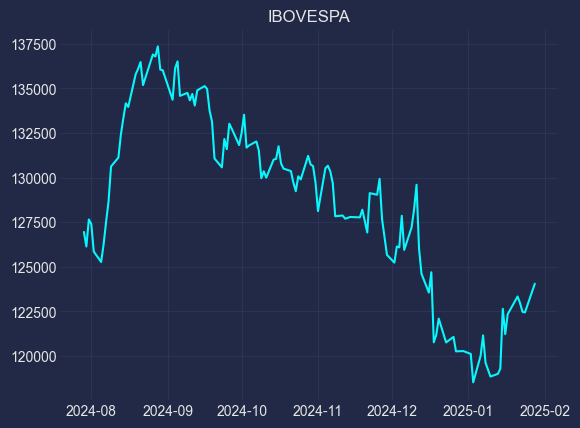

In [21]:
plt.plot(dados_mercado["IBOVESPA"])
plt.title("IBOVESPA")

plt.savefig("ibovespa.png")

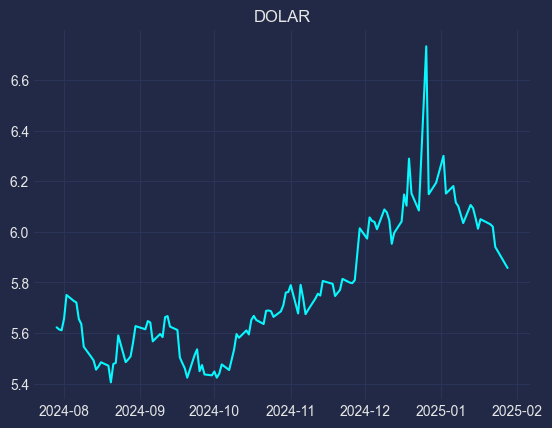

In [22]:
plt.plot(dados_mercado["DOLAR"])
plt.title("DOLAR")

plt.savefig("dolar.png")

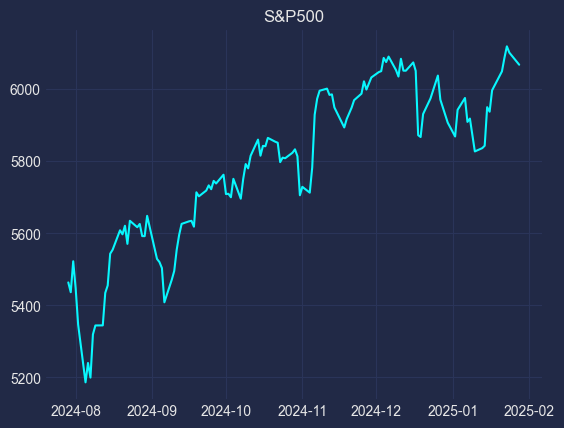

In [23]:
plt.plot(dados_mercado["S&P500"])
plt.title("S&P500")

plt.savefig("sp500.png")

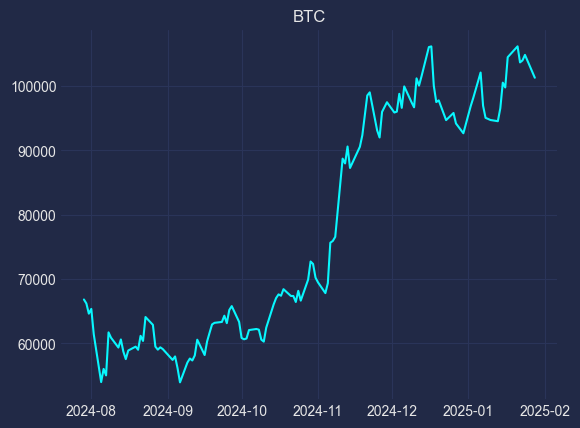

In [24]:
plt.plot(dados_mercado["BTC"])
plt.title("BTC")

plt.savefig("btc.png")

# Passo 5 - Calcular retornos diários.

In [25]:
retornos_diarios = dados_mercado.pct_change()

retornos_diarios

,DOLAR,BTC,IBOVESPA,S&P500
Date,,,,
2024-07-29,NaN,NaN,NaN,NaN
2024-07-30,-0.001483,-0.009262,-0.006420,-0.004960
2024-07-31,-0.000606,-0.023893,0.011995,0.015793
2024-08-01,0.008109,0.011425,-0.002013,-0.013694
2024-08-02,0.016618,-0.060321,-0.012096,-0.018382
...,...,...,...,...
2025-01-21,-0.003322,0.016123,0.008075,0.008768
2025-01-22,-0.001542,-0.023488,-0.002967,0.006138
2025-01-23,-0.013321,0.002963,-0.003977,0.005313


In [26]:
retorno_dolar = retornos_diarios["DOLAR"].iloc[-1]
retorno_ibovespa = retornos_diarios["IBOVESPA"].iloc[-1]
retorno_sp = retornos_diarios["S&P500"].iloc[-1]
retorno_btc = retornos_diarios["BTC"].iloc[-1]

In [27]:
retorno_dolar = str(round(retorno_dolar * 100, 2)) + "%"

retorno_dolar

'-1.13%'

In [28]:
retorno_ibovespa = str(round(retorno_ibovespa * 100, 2)) + "%"
retorno_sp = str(round(retorno_sp * 100, 2)) + "%"
retorno_btc = str(round(retorno_btc * 100, 2)) + "%"

retorno_btc

'-3.39%'

# Passo 6 - Configurar e enviar o e-mail

In [ ]:
!pip install pywin32

In [40]:
import win32com.client as win32

In [41]:
outlook = win32.Dispatch("outlook.application") 

email = outlook.CreateItem(0)

In [ ]:
email.To = "email destinatario"
email.Subject = "Relatório de Mercado"
email.Body = f'''Prezado diretor, segue o relatório de mercado:

* O Ibovespa teve o retorno de {retorno_ibovespa}.
* O Dólar teve o retorno de {retorno_dolar}.
* O S&P500 teve o retorno de {retorno_sp}.
* O BTC teve o retorno de {retorno_btc}.

Segue em anexo a peformance dos ativos nos últimos 6 meses.

Att,
Melhor estagiário do mundo


'''

anexo_ibovespa = r"CAMINHO_DO_SEU_PC\ibovespa.png"
anexo_dolar = r"CAMINHO_DO_SEU_PC\dolar.png"
anexo_sp = r"CAMINHO_DO_SEU_PC\sp500.png"
anexo_btc = r"CAMINHO_DO_SEU_PC\btc.png"

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)
email.Attachments.Add(anexo_sp)
email.Attachments.Add(anexo_btc)

email.Send()
